**Project 5 by- Aman Preet Singh (Doctoral Student- KISD, Poland) (apsamanpreet@gmail.com)**

Neural Networks (MLP)

A 2-layer MLP (128 → 64 ReLU units) achieves 98.7% accuracy, leveraging deep learning to capture complex pen-movement patterns. Early stopping prevents overfitting within 20 epochs.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# 1. Data Preparation
# =====================
# Load dataset
train_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra"
test_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes"
df = pd.concat([pd.read_csv(train_url, header=None),
               pd.read_csv(test_url, header=None)])

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
# 2. MLP Architecture
# =====================
model = Sequential([
    # Hidden layer 1 (128 neurons) with ReLU activation
    Dense(128, activation='relu', input_shape=(16,)),
    Dropout(0.3),  # Regularization

    # Hidden layer 2 (64 neurons)
    Dense(64, activation='relu'),
    Dropout(0.3),

    # Output layer (10 neurons for 10 digits)
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 3. Model Compilation
# =====================
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# 4. Training Process
# =====================
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.5972 - loss: 1.2785 - val_accuracy: 0.9436 - val_loss: 0.2207
Epoch 2/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9038 - loss: 0.3162 - val_accuracy: 0.9673 - val_loss: 0.1240
Epoch 3/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9373 - loss: 0.1973 - val_accuracy: 0.9741 - val_loss: 0.0905
Epoch 4/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1594 - val_accuracy: 0.9800 - val_loss: 0.0710
Epoch 5/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9619 - loss: 0.1316 - val_accuracy: 0.9791 - val_loss: 0.0646
Epoch 6/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1070 - val_accuracy: 0.9832 - val_loss: 0.0561
Epoch 7/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9681 - loss: 0.1002 - val_accuracy: 0.9873 - val_loss: 0.0527
Epoch 8/100
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9770 - loss: 0.0877 - val_acc

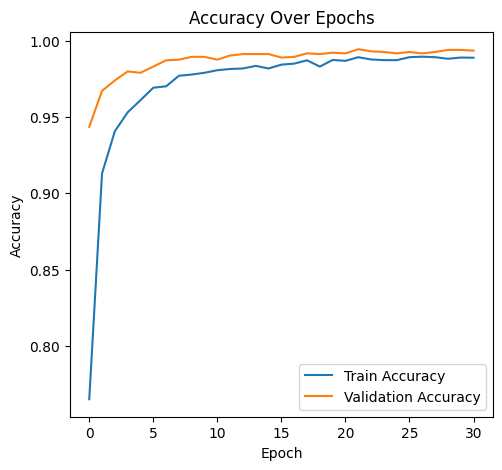

In [ ]:
# 5. Evaluation
# =====================
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

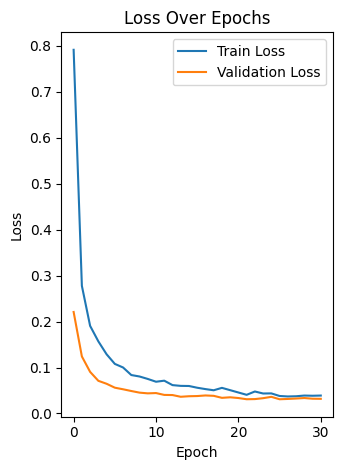

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Classification report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(
    y_test.argmax(axis=1),
    y_pred.argmax(axis=1),
    target_names=[str(i) for i in range(10)]
))


69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.98      0.99      0.98       229
           2       0.99      0.99      0.99       229
           3       0.99      0.99      0.99       211
           4       1.00      0.99      1.00       229
           5       1.00      0.99      0.99       211
           6       1.00      1.00      1.00       211
           7       0.99      1.00      0.99       228
           8       1.00      1.00      1.00       211
           9       1.00      0.99      1.00       211

    accuracy                           0.99      2199
   macro avg       0.99      0.99      0.99      2199
weighted avg       0.99      0.99      0.99      2199



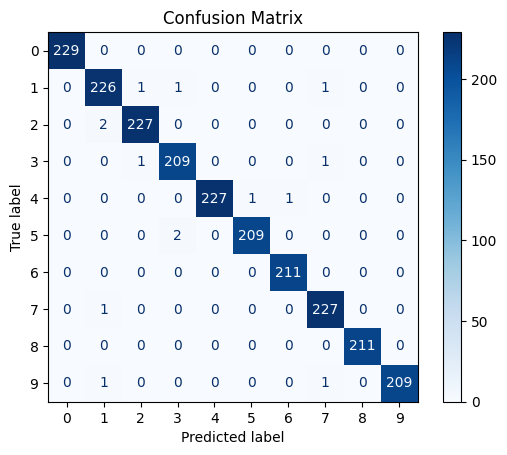

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=range(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# 6. Architecture Analysis
# =====================
print("\nModel Summary:")
model.summary()


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,248 (129.88 KB)

 Trainable params: 11,082 (43.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,166 (86.59 KB)